# 🌍 Make Chemistry Green Again

## Hello

**What if we could measure how environmentally friendly a chemical reaction was?**

This was the question that guided the creation of **Make Chemistry Green Again**.  
In an era marked by growing environmental challenges, green chemistry has become a vital discipline.  
Guided by its 12 foundational principles, green chemistry seeks to minimize or eliminate the use and generation of hazardous substances in chemical processes.

---

## Introduction

**Make Chemistry Green Again** is an interactive tool that evaluates the **greenness and safety** of chemical reactions using the core principles of green chemistry.

### 🔍 How it works

Simply input your **reactants and products** in any of the following formats:

- SMILES
- Chemical name
- Molecular drawing

The app then analyzes the reaction and provides an intuitive, visually guided evaluation.

### 🧩 Key features

- ✅ **Color-coded safety and environmental scores**  
- 🧬 **3D molecular models** of all compounds  
- 🔁 **Reaction scheme diagrams**  
- ⚠️ **GHS hazard pictograms**  
- 💡 **AI-predicted solvents and catalysts that align with green chemistry**

---

## ✅ Green Chemistry Checklist

The heart of the app is the **Green Chemistry Checklist**, based on the 12 Principles of Green Chemistry.  
From these, we extract key criteria to calculate a **Greenness Score**, displayed using a **traffic light system**:

- 🟥 **Red** – High risk or low efficiency  
- 🟧 **Orange** – Acceptable, but needs improvement  
- 🟩 **Green** – Good alignment with green chemistry principles

---

### Conditions Evaluated

**1. Atom Economy**  
*Principle #2 – Maximize incorporation of all materials into the final product.*

**2. E-Factor (Environmental Factor)**  
*Principle #1 – Prevent waste instead of treating it after formation.*

**3. Hazardous By-Products**  
*Principle #3 – Minimize toxicity to human health and the environment.*

**4. Fire & Explosion Risk**  
*Principle #12 – Design processes to reduce the risk of chemical accidents.*

---

## 🔒 Chemical Safety Insights

Each evaluated reaction includes a **detailed safety report** for all chemicals involved:

- ⚠️ **Hazard statements**  
- 📛 **GHS pictograms**  
- 📊 **Clear risk breakdowns**

These insights allow users to **revise and re-evaluate** their reactions based on feedback,  
encouraging safer and more sustainable chemistry.

### 1. Predicting the Most Suitable Solvent and Catalyst

To recommend the **best solvent and catalyst** for a given reaction, we use **Google’s Gemini-2 Flash Lite model** – chosen for its **speed** and **efficiency**.

---

### 🧠 How it works

The function `predict_conditions_with_gemini(reactants, products)` sends a **structured prompt** to the Gemini API. This prompt:

- Frames the task as one suited for a **professional chemist**
- Provides the **reactants and products in SMILES format**
- Asks Gemini to consider:
  - ✅ Solubility  
  - 🔄 Reaction mechanism  
  - 🌱 Green chemistry principles  

Gemini responds with a **JSON** containing:
- The most suitable **solvent**
- The most suitable **catalyst**
- A **confidence score** (estimated by the model)

> ℹ️ *The confidence score is superficial but helps filter out unusual predictions.*

---

### Gemini Configuration

| Parameter      | Value | Purpose                                  |
|----------------|--------|------------------------------------------|
| `temperature`  | `0.1`  | Ensures stable and repeatable outputs     |
| `top_p`        | `0.95` | Allows a bit of diversity                 |
| `top_k`        | `40`   | Limits output to top-ranked token choices |

### 🔬 Example: Predicting Reaction Conditions


In [127]:
from suppress_warning import suppress_streamlit_warnings
suppress_streamlit_warnings()

# Step 0: Import the prediction function from the app
from mcga.app import predict_conditions_with_gemini

# Step 1: Define a simple reaction
# Example: Acetic acid + Ethanol → Ethyl acetate + Water
reactants = ["CC(=O)O", "CCO"]  # Acetic acid, Ethanol
products = ["CCOC(=O)C", "O"]   # Ethyl acetate, Water

# Step 2: Predict optimal solvent and catalyst
result = predict_conditions_with_gemini(reactants, products)

# Step 3: Display the result
import json
print("Predicted Conditions:")
print(json.dumps(result, indent=4))


Predicted Conditions:
{
    "solvent": "Ethanol",
    "catalyst": "Sulfuric acid",
    "confidence_score": 99.5
}


## 2. Basic Functions and Examples


In [139]:
import sys
sys.path.append('../src')  
from mcga.app import (
    display_metric_feedback,
    calculate_atom_economy_balanced,
    calculate_efactor_balanced,
)
from mcga.balancing_equations import ( get_balanced_equation)


### `display_metric_feedback`

This function is the **backbone of visual scoring**. It uses a **traffic light color system** to give intuitive feedback on green chemistry criteria.

It can accept:
- Quantitative values (e.g. 75% atom economy)
- Qualitative categories (e.g. "low", "medium", "high")

Thresholds or categories must be specified by the caller.


### `get_balanced_equation`

This function converts SMILES strings into molecular formulas and returns a **balanced chemical equation** using RDKit and ChemPy.

It is critical for calculating metrics like **atom economy** and **E-factor**.


In [129]:
# Step 1: Define reactants and products
reactants = ["C", "O=O"]               # Methane and Oxygen
products = ["C(=O)=O", "O"]            # Carbon dioxide and Water

# Step 2: Import and balance
from mcga.app import get_balanced_equation
balanced = get_balanced_equation(reactants, products)
# summary
print("\nSummary:")
reactant_str = " + ".join(f"{coef} {formula}" for formula, coef in balanced["reactants"].items())
product_str = " + ".join(f"{coef} {formula}" for formula, coef in balanced["products"].items())
print(f"{reactant_str} → {product_str}")



Summary:
1 CH4 + 2 O2 → 1 CO2 + 2 H2O


### `calculate_atom_economy_balanced`

Calculates the **atom economy** of a reaction using the balanced equation.
Atom economy = (mass of desired product / total mass of reactants) × 100

You must provide the desired product's formula (e.g., `"CO2"` or `"C(=O)=O"`).


In [ ]:
reactants = ["C", "O=O"]
products = ["C(=O)=O", "O"]

from mcga.app import get_balanced_equation, calculate_atom_economy_balanced
balanced = get_balanced_equation(reactants, products)

# Pick the correct key from the product dictionary
target_formula = "CO2"

ae = calculate_atom_economy_balanced(
    balanced["reactants"],
    balanced["products"],
    balanced["formula_to_smiles"],
    target_formula
)
print(f"\nAtom Economy for producing {target_formula}: {ae:.2f}%" if ae else "Could not calculate AE.")




Atom Economy for producing CO2: 54.98%


### `calculate_efactor_balanced`

Calculates the **E-factor** = (total waste / desired product mass)

This helps assess how much **non-useful material** is generated per unit of product.


In [ ]:
reactants = ["C", "O=O"]
products = ["C(=O)=O", "O"]

from mcga.app import get_balanced_equation, calculate_efactor_balanced
balanced = get_balanced_equation(reactants, products)

target_formula = "CO2"

ef = calculate_efactor_balanced(
    balanced["reactants"],
    balanced["products"],
    balanced["formula_to_smiles"],
    target_formula
)
print(f"E-Factor for producing {target_formula}: {ef:.2f}")



E-Factor for producing CO2: 0.82


## 3. Working with PubChem

### CID
To evaluate some of our criteria, we need to ask the PubChem website (https://pubchem.ncbi.nlm.nih.gov/) however PubChem is organised using CIDs (Compound IDs) which are identifiers for each chemical molecule registered in the PubChem database. 
PubChem database. This makes it possible to find all the information relating to this molecule, such as its structure, physical properties or even toxicity. The function get_cid takes a molecule under SMILES representation as input and outputs its CID. Below is an example to show that it is a CID:


In [104]:
from mcga.app import get_cid

smiles_aspirin = "CC(=O)OC1=CC=CC=C1C(=O)O"
cid_aspirin = get_cid(smiles_aspirin)

print(cid_aspirin)


2244


### Flash Point
As mentioned above, it can have multiple physical properties, such as flash point. This is the lowest temperature at which it emits enough vapour to form a flammable mixture with air. The function get_flash_point_from_smiles takes a SMILES representation of a molecule as input and gives the flash point in degrees Celsius. Let’s go back to the example of aspirin :


In [143]:
from mcga.app import get_flash_point_from_smiles

flash_point = get_flash_point_from_smiles(smiles_aspirin)

print(f"Flash point of your molecule is {flash_point}°C")


Flash point of your molecule is 250.0°C


### H codes
For several principles, the toxicity of reagents, products and solvents needs to be considered. To estimate the hazardousness, the H codes, which are hazard statements, provide a clear picture of the risks incurred by chemical products. The function get_get_ghs_data also takes a SMILES representation of a molecule as input and then goes to PubChem to output a list of H codes as output. Let's take another example using benzene :


In [ ]:
smiles = "c1ccccc1"

from mcga.app import get_ghs_data, get_ghs_meaning

h_codes = get_ghs_data(smiles)

print(f"H-codes for benzene ({smiles}):")
for code in h_codes:
    meaning = get_ghs_meaning(code)
    print(f"  {code} – {meaning}")



H-codes for benzene (c1ccccc1):
  H340 – May cause genetic defects
  H412 – Harmful to aquatic life with long lasting effects
  H319 – Causes serious eye irritation
  H304 – May be fatal if swallowed and enters airways
  H225 – Highly flammable liquid and vapour
  H350 – May cause cancer
  H315 – Causes skin irritation
  H372 – Causes damage to organs through prolonged or repeated exposure


### Hazard class pictograms 🔥☠️⚠️
With the H codes that we have found, we can associate them with the hazard pictograms, which makes it easier to understand and classify the risks that the product may cause. The function is_toxic has as input the SMILES of the molecule and outputs the list of classes that represent a real danger to which the molecule belongs.


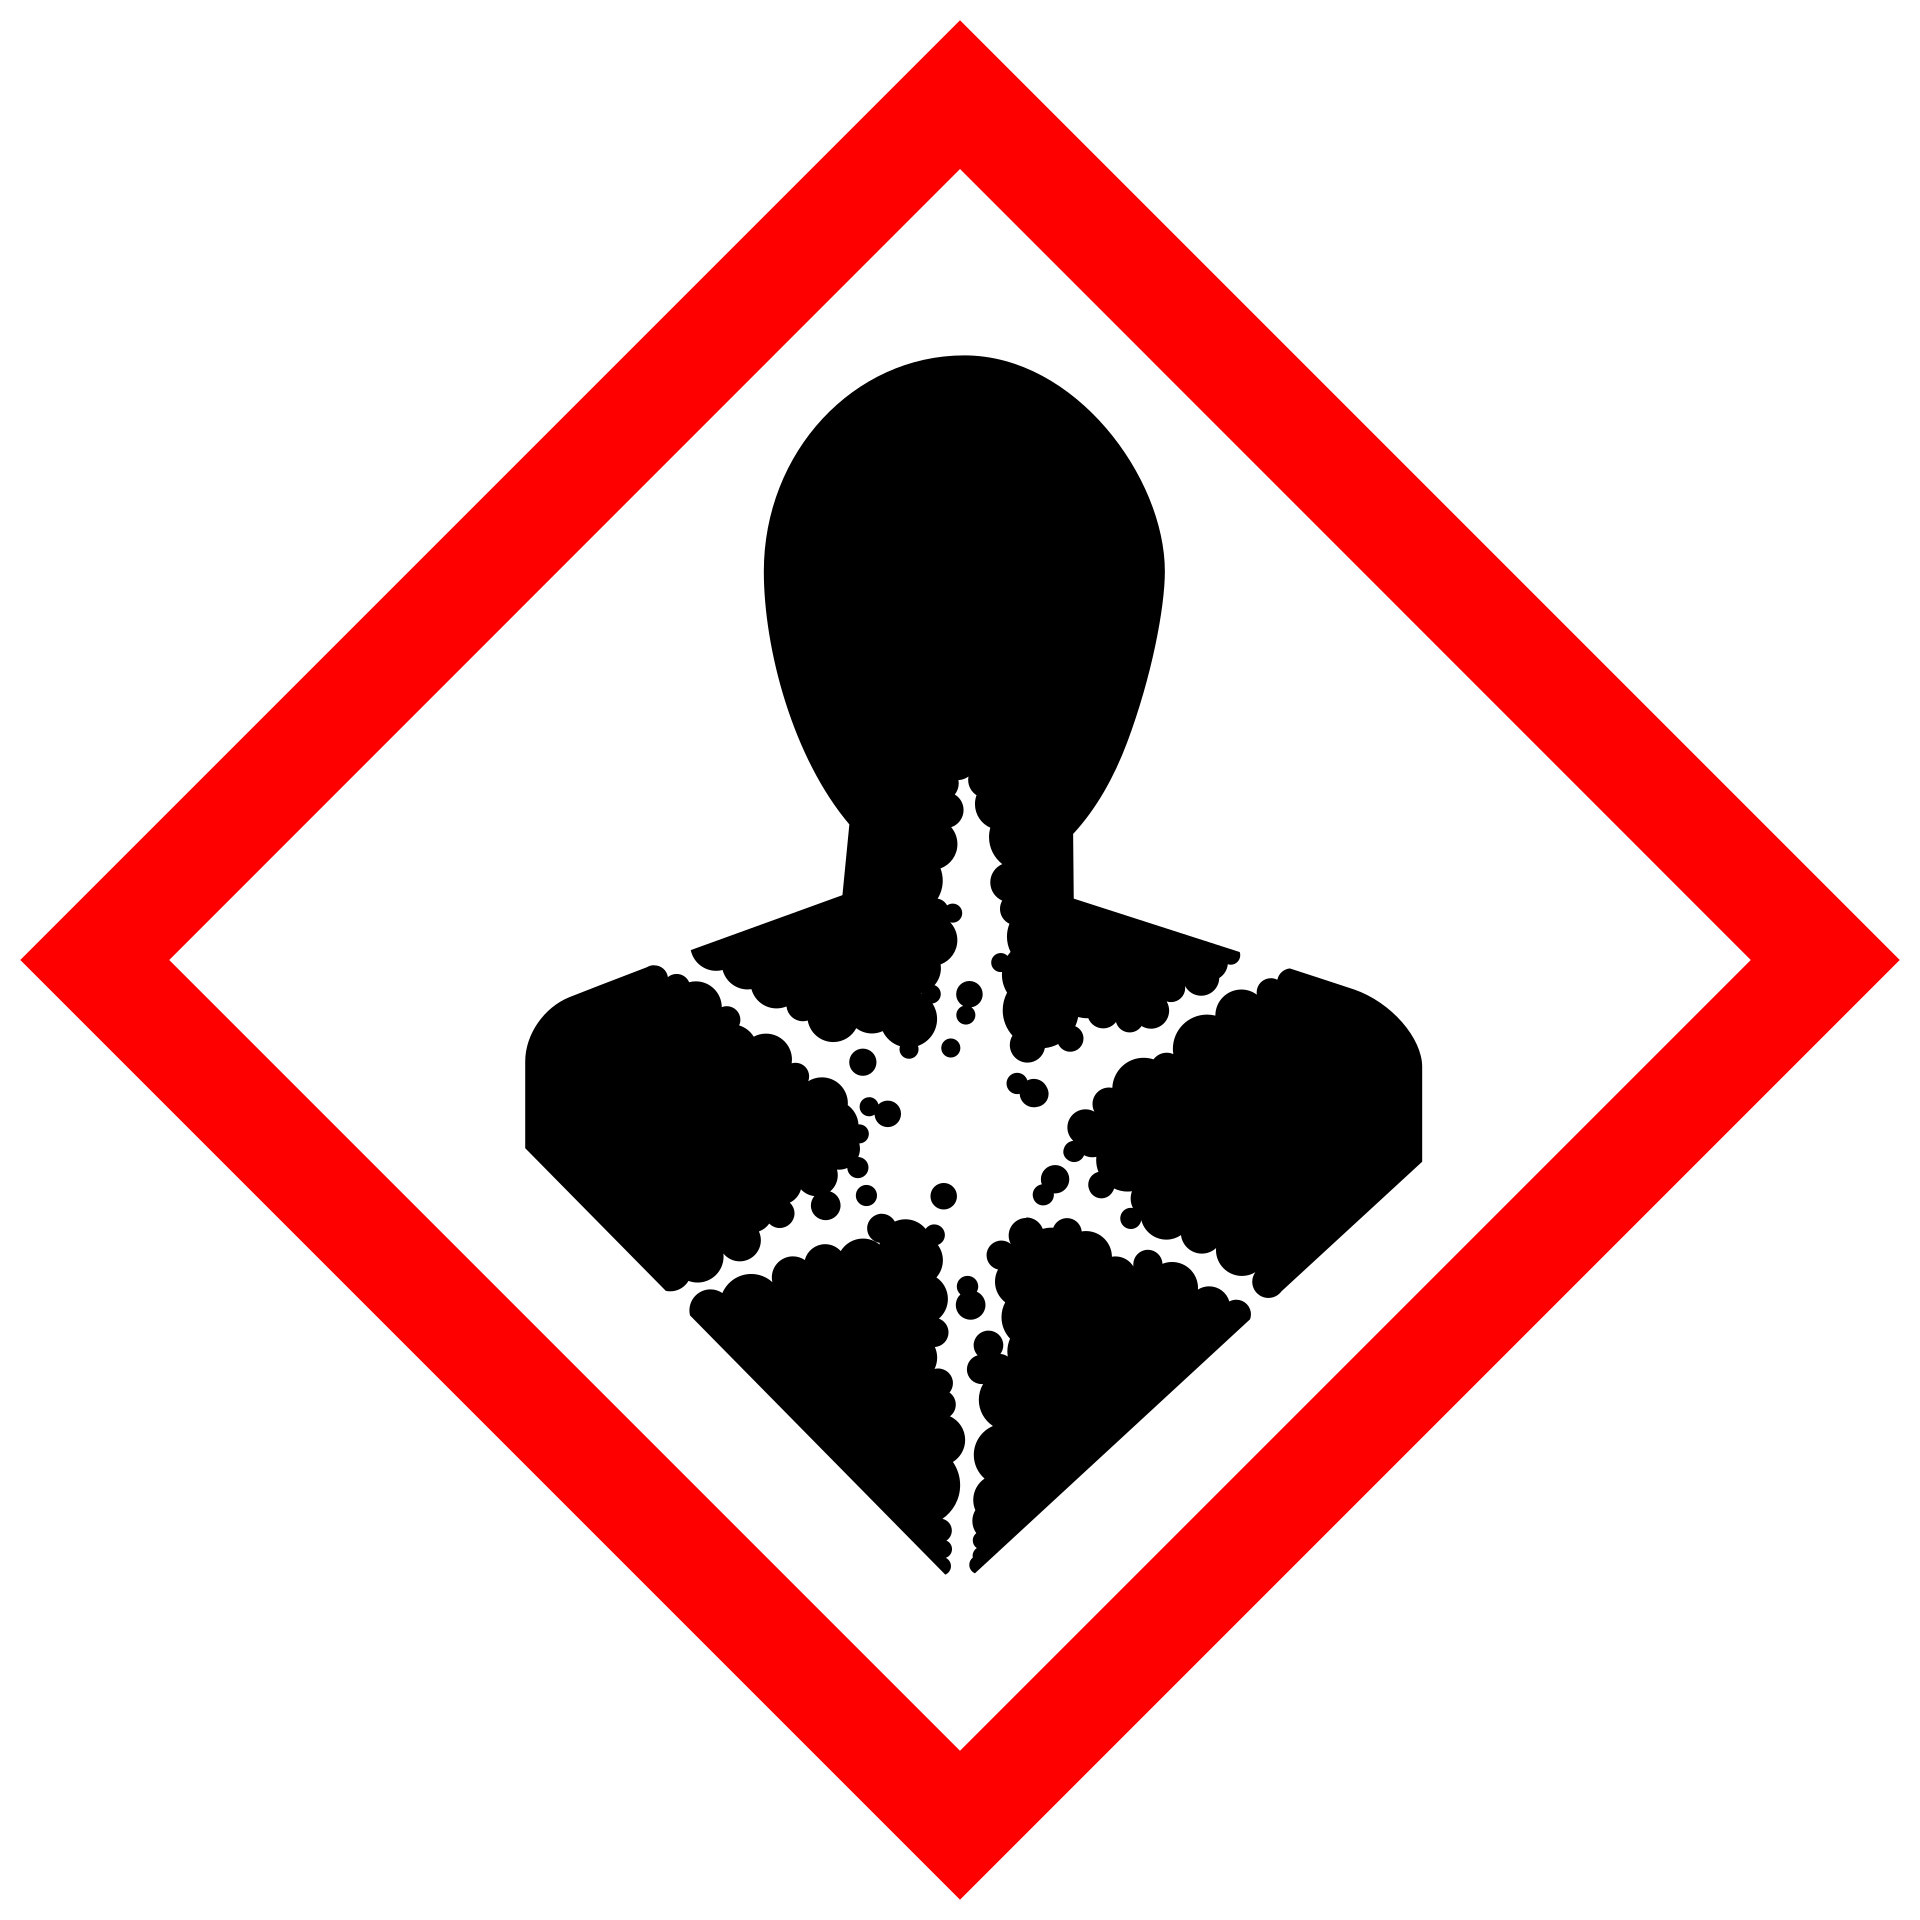

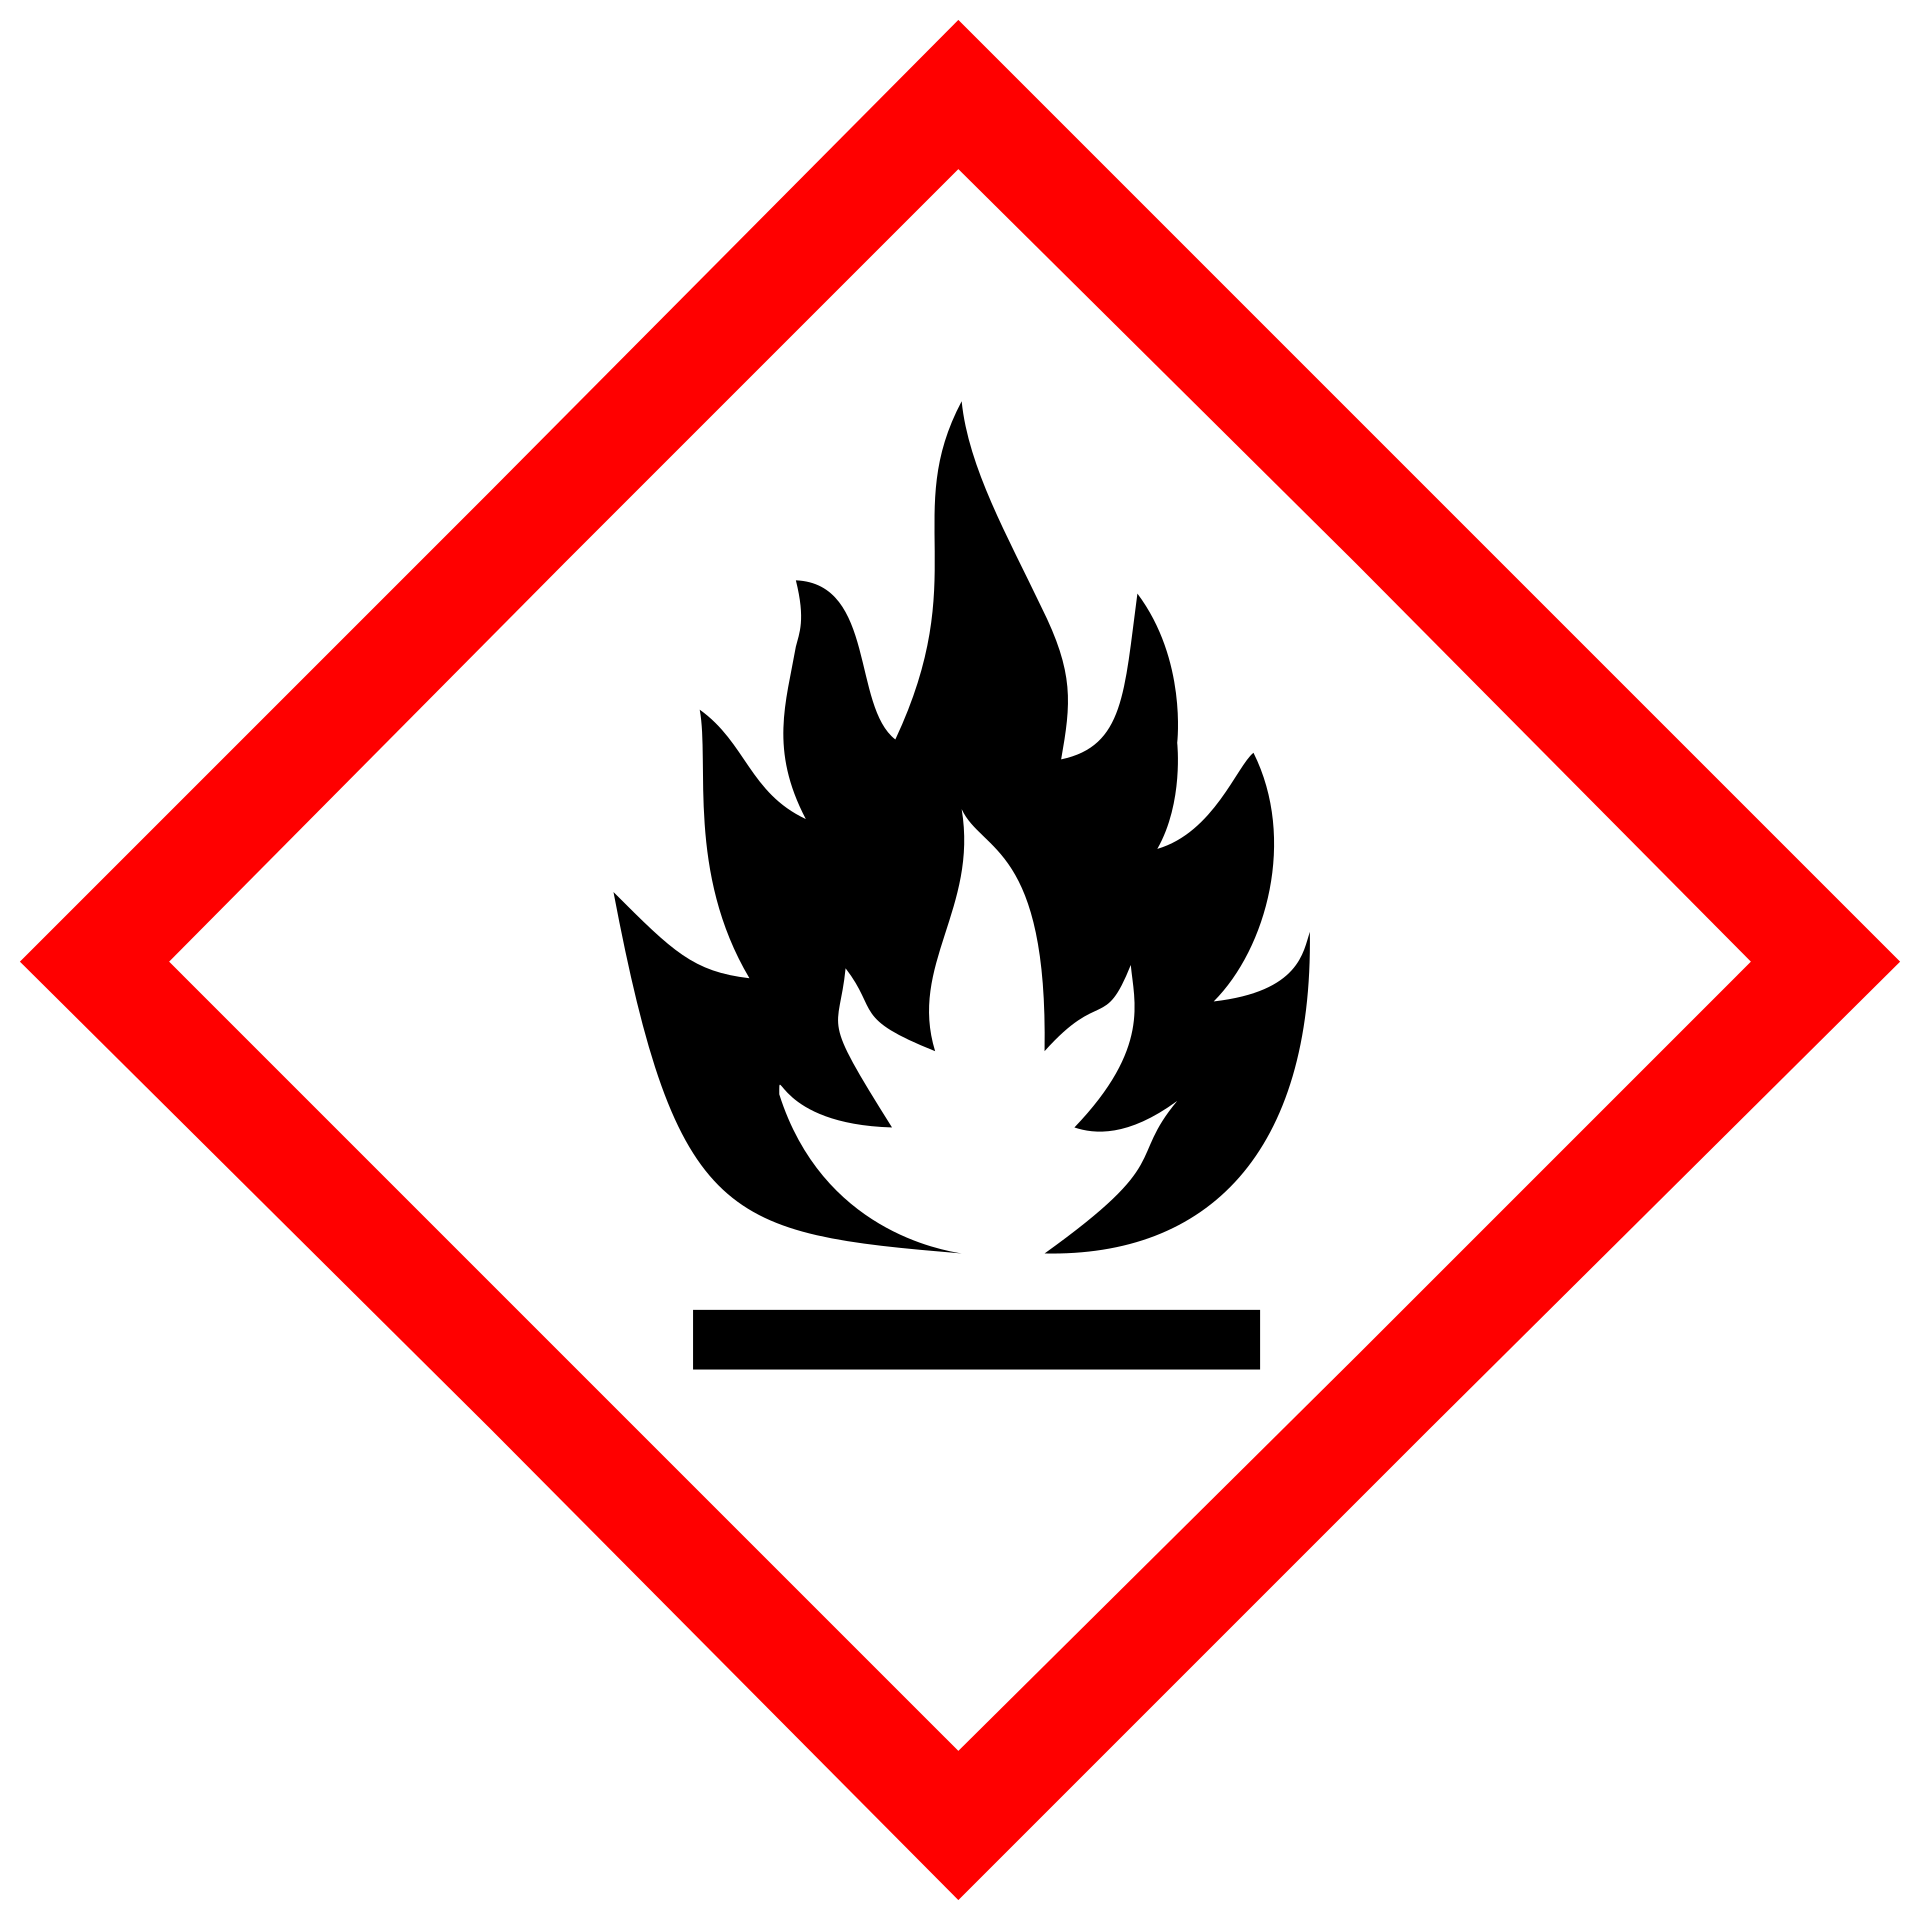

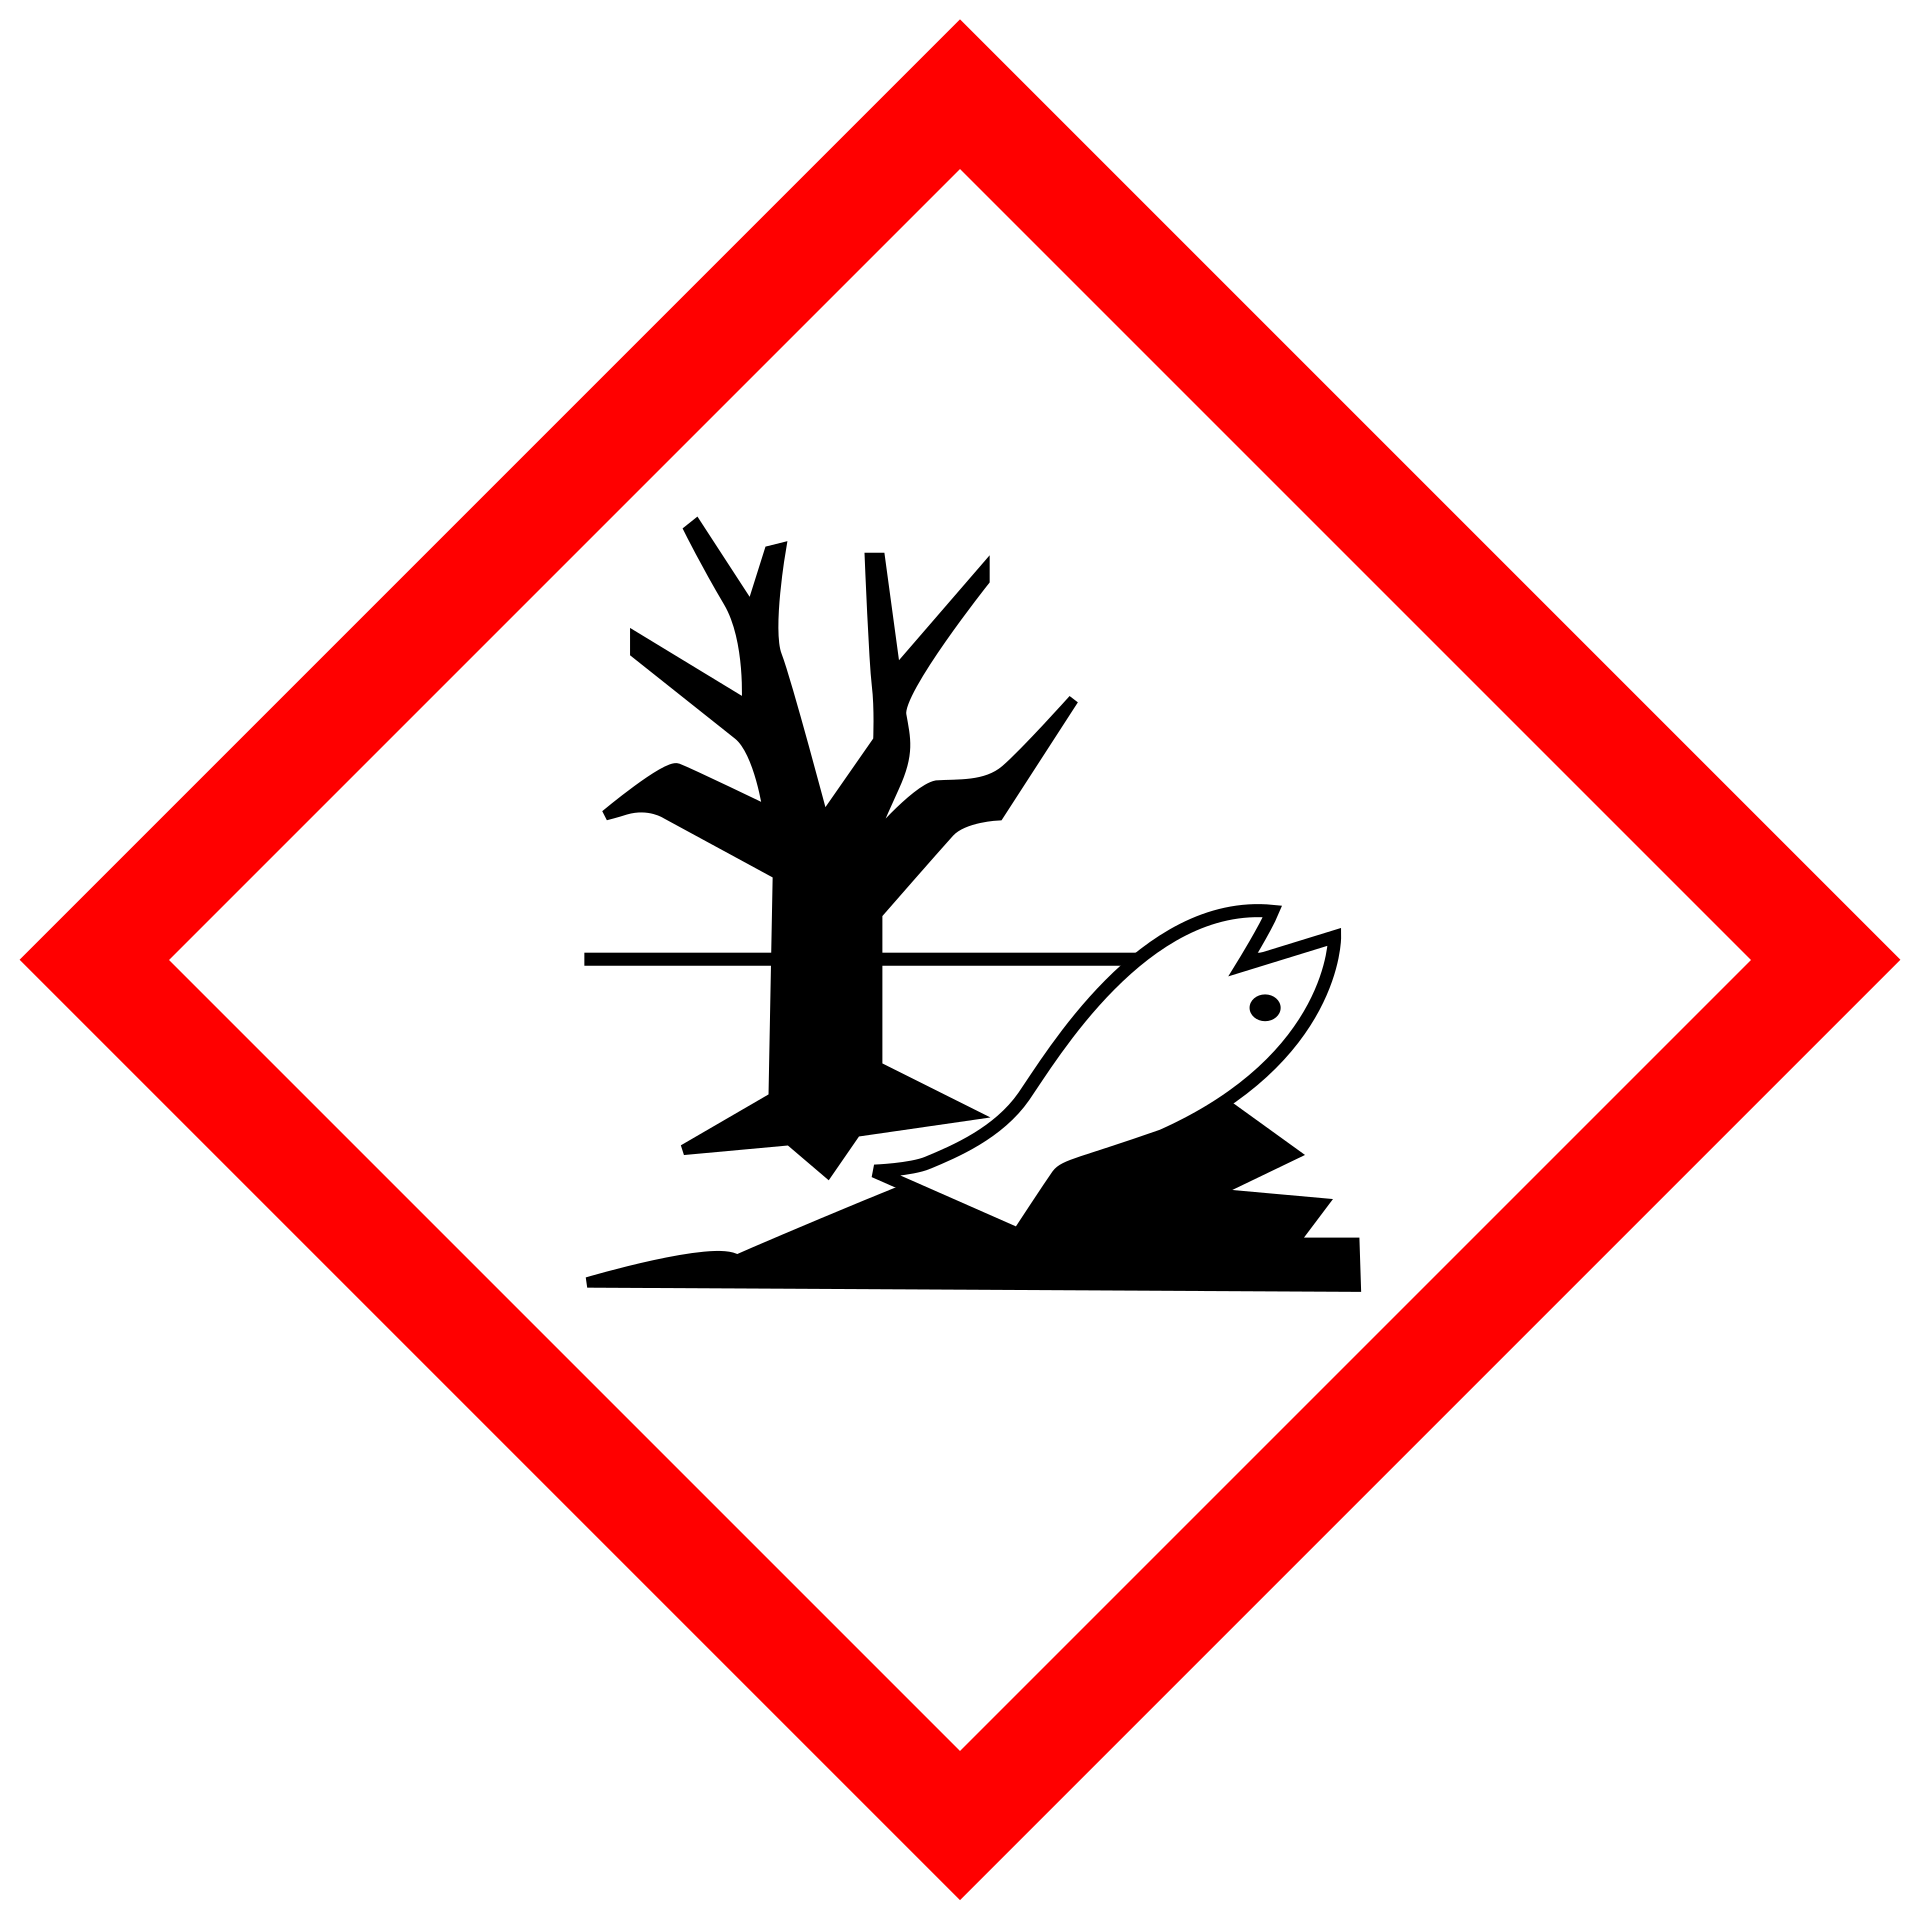

In [ ]:
from mcga.app import hazard_statements
from IPython.display import Image, display
from pathlib import Path

# SMILES for benzene
smiles = "c1ccccc1"

# Hazard → icon filename
PICTO_MAP = {
    "Flammable": "GHS-flammable.png",
    "Explosive": "GHS-explosive.png",
    "Oxidizing": "GHS-oxidizing.png",
    "Corrosive": "GHS-corrosive.png",
    "Toxic": "GHS-acute_toxicity.png",
    "Health Hazard": "GHS-health_hazard.png",
    "Environment Hazard": "GHS-environment_hazard.png",
}

# Path to pictograms (two folders up)
ASSETS_DIR = Path("../../assets")

# Display smaller icons
for cat in hazard_statements(smiles):
    path = ASSETS_DIR / PICTO_MAP.get(cat, "")
    if path.exists():
        display(Image(filename=path, width=64))


## 4.Discussion

### Difficulties encountered

Before starting the project, we had to make several decisions about which green chemistry principles could realistically be evaluated. Some principles proved too time consuming or nearly impossible to assess, such as estimating the energy consumption of a reaction or determining whether renewable raw materials were used. These aspects were difficult to judge because we often lacked detailed information about the experimental conditions. In other cases, such as assessing the half-life of products to evaluate their environmental persistence, we simply could not find appropriate databases or reliable data.

Another challenge was finding the right reaction conditions, specifically the solvent or catalyst when the user did not provide them. To address this, we decided to use machine learning to predict these elements automatically. However, tools like ORDerly or the RXN Condition Selector were too complex for us to implement due to our limited experience, and we were unable to get them working.

While integrating Gemini, one of the first issues we faced involved managing the API key. Initially, the key was hardcoded directly into the script. Recognizing the security risk, we later moved it to a hidden configuration file using Streamlit’s `secrets.toml` mechanism. This allowed us to access it securely using `st.secrets`, preventing the key from being exposed when pushing the code to public repositories like GitHub.

We also encountered difficulties while trying to use the ECOTOX database to retrieve LD50 values. The dataset was massive; over 1 GB across 53 text files and parsing it proved more complicated than expected. Critical metrics like LD50 or BAF were inconsistently formatted and scattered across multiple files, making automation unreliable. Attempts to retrieve LD50 data directly from PubChem also failed. Ultimately, integrating toxicological data at scale required far more preprocessing and structure than we initially anticipated.

When attempting to balance certain reactions using the chempy.balance_stoichiometry function, we encountered failures in producing integer stoichiometric coefficients. A notable example was the synthesis of aspirin (salicylic acid + acetic anhydride → aspirin + acetic acid), where Chempy returned symbolic expressions with variables (e.g., x1) instead of numeric values. Despite confirming that the molecular formulas and SMILES mappings were correctly parsed, the output included terms like 11 - 2*x1 and 8*x1 + 1, making the result unusable. Since key metrics such as atom economy and E-factor rely on concrete numbers, this symbolic output triggered type conversion and formatting errors in downstream calculations. Although the reaction is well-established with a 1:1:1:1 ratio, Chempy was unable to resolve it numerically
